# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ryan Nugroho
- **Email:** ryanayr2112@gmail.com
- **ID Dicoding:** xryanayrx

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda pada tahun 2011-2012?
2. Bagaimana pengaruh jam/waktu terhadap jumlah penyewaan sepeda pada tahun 2011-2012?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

**Memuat data yang sudah dikumpulkan**

In [ ]:
day = pd.read_csv("https://raw.githubusercontent.com/ryannugroho/Analisis-Data/refs/heads/main/data/day.csv")
hour = pd.read_csv("https://raw.githubusercontent.com/ryannugroho/Analisis-Data/refs/heads/main/data/hour.csv")

In [ ]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Tabel day memiliki 16 kolom, berdasarkan hasil pemeriksaan menggunakan fungsi head().
- Tabel hour memiliki 17 kolom, berdasarkan hasil pemeriksaan menggunakan fungsi head().
- Perbedaan antara tabel day dan hour terletak pada kolom hr, yang hanya terdapat pada tabel hour sebagai penanda hour/jam.

## Assessing Data

In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika dilihat dengan seksama, terdapat kesalahan tipe data untuk kolom **dteday**. Kolom tersebut harusnya direpresentasikan sebagai tipe data **datetime**, **bukan object** (ini digunakan untuk tipe data string).

In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jika dilihat dengan seksama, terdapat kesalahan tipe data untuk kolom **dteday**. Kolom tersebut harusnya direpresentasikan sebagai tipe data **datetime**, **bukan object** (ini digunakan untuk tipe data string).

In [ ]:
day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Dapat dilihat bahwa tidak terdapat missing value pada tabel day.

In [ ]:
hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Dapat dilihat bahwa tidak terdapat missing value pada tabel hour.

In [ ]:
day.duplicated().sum()

0

Tidak ada data yang duplicate pada tabel day.

In [ ]:
hour.duplicated().sum()

0

Tidak ada data yang duplicate pada tabel hour.

**Insight:**
- Pada tabel **day_df**, ditemukan kesalahan tipe data pada kolom **dteday**, berdasarkan hasil pemeriksaan menggunakan fungsi info().
- Pada tabel **hour_df**, ditemukan kesalahan tipe data pada kolom **dteday**, berdasarkan hasil pemeriksaan menggunakan fungsi info().

## Cleaning Data

In [ ]:
column = "dteday"
day[column] = pd.to_datetime(day[column])
hour[column] = pd.to_datetime(hour[column])

Mengubah tipe data pada kolom **dteday** menjadi datetime

In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Berhasil memperbaiki tipe data pada kolom dteday di tabel day_df dari object menjadi datetime menggunakan fungsi to_datetime() dari library pandas.
- Berhasil memperbaiki tipe data pada kolom dteday di tabel hour_df dari object menjadi datetime menggunakan fungsi to_datetime() dari library pandas.

## Exploratory Data Analysis (EDA)

### Eksplorasi Data day

**Menampilkan rangkuman parameter statistik dengan menggunakan function describe()**

In [ ]:
day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Menampilkan jumlah penyewaan sepeda **casual** dan **registered** berdasarkan cuaca

In [ ]:
weathersit_count= day.groupby("weathersit")[["casual", "registered"]].sum()
weathersit_count

,casual,registered
weathersit,,
1,446346,1811606
2,169776,827082
3,3895,33974


### Eksplorasi Data hour

**Menampilkan rangkuman parameter statistik dengan menggunakan function describe()**

In [ ]:
hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
hour["hr_group"] = hour.hr.apply(lambda x: "Dini Hari" if x>=0 and x<6
                                       else ("Pagi" if x>=6 and x<11
                                             else ("Siang" if x>=11 and x<15
                                                   else "Sore" if x>=15 and x<18 else "Malam")
                                            )
                                      )
hour.groupby("hr_group")[['casual', 'registered']].sum()

,casual,registered
hr_group,,
Dini Hari,19275,87234
Malam,154214,831895
Pagi,83062,672937
Siang,200806,495499
Sore,162660,585097


**Insight:**
- Jumlah penyewaan sepeda, baik untuk pengguna casual maupun registered, cenderung meningkat drastis saat cuaca cerah.
- Penyewaan sepeda oleh pengguna casual mencapai puncaknya pada siang hari, sedangkan penyewaan oleh pengguna registered lebih banyak terjadi pada malam hari.



## Visualization & Explanatory Analysis

### Pertanyaan 1
Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda pada tahun 2011-2012?

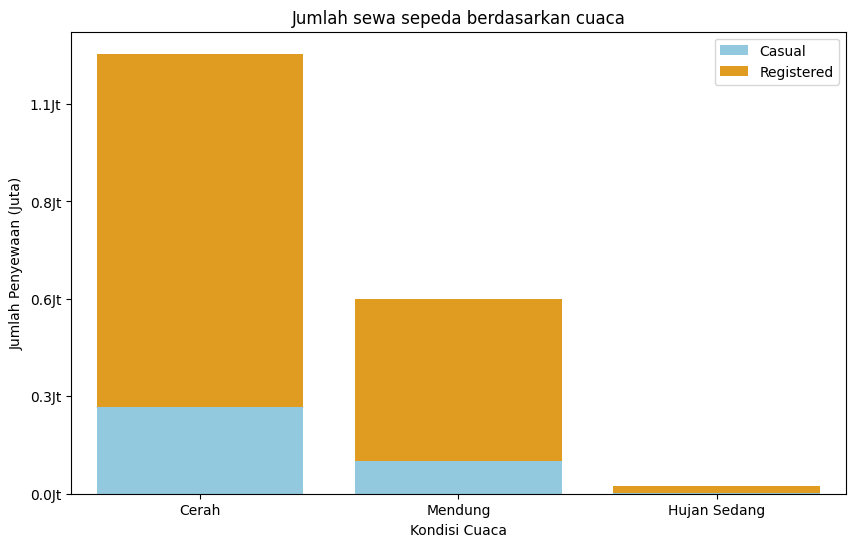

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=weathersit_count.index, y=weathersit_count['casual'], color='skyblue', label='Casual')
sns.barplot(x=weathersit_count.index, y=weathersit_count['registered'], color='orange', label='Registered', bottom=weathersit_count['casual'])

# Menambahkan label dan judul
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan (Juta)')  # Mengubah label sumbu y
plt.title('Jumlah sewa sepeda berdasarkan cuaca')
plt.legend()

# Mengubah label sumbu x
plt.xticks(weathersit_count.index-1, ['Cerah', 'Mendung', 'Hujan Sedang'])

# Mengubah sumbu y menjadi satuan juta
def custom_formatter(x, pos):
    return f'{x/1811606:.1f}Jt'  # Format angka menjadi jutaan dengan 1 desimal, perhatikan faktor pembagi

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))

# Menampilkan plot
plt.show()

### Pertanyaan 2
Bagaimana pengaruh jam/waktu terhadap jumlah penyewaan sepeda pada tahun 2011-2012?

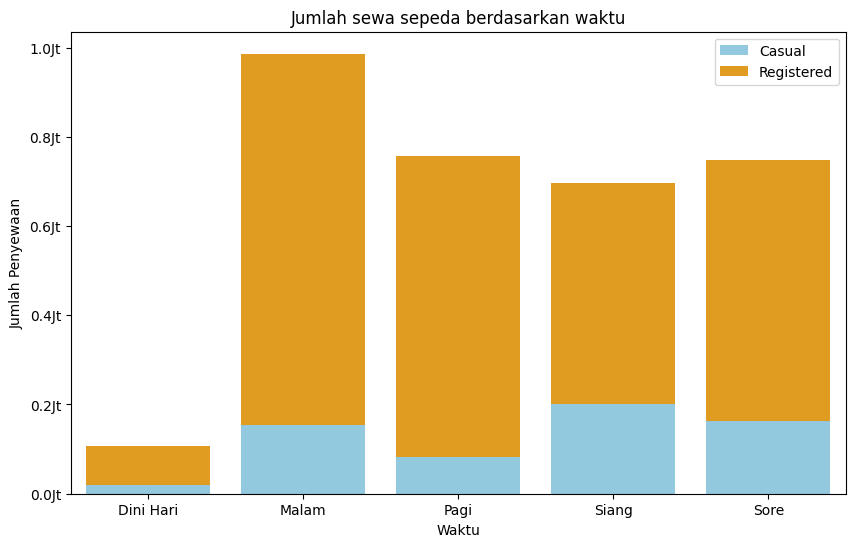

In [ ]:
# Menghitung jumlah penyewaan berdasarkan hr_group
hr_group_count = hour.groupby("hr_group")[['casual', 'registered']].sum()

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=hr_group_count.index, y=hr_group_count['casual'], color='skyblue', label='Casual')
sns.barplot(x=hr_group_count.index, y=hr_group_count['registered'], color='orange', label='Registered', bottom=hr_group_count['casual'])

# Menambahkan label dan judul
plt.xlabel('Waktu')
plt.ylabel('Jumlah Penyewaan')
plt.title('Jumlah sewa sepeda berdasarkan waktu')
plt.legend()

# Mengubah sumbu y menjadi satuan juta
def custom_formatter(x, pos):
    return f'{x/1000000:.1f}Jt'  # Format angka menjadi jutaan dengan 1 desimal, perhatikan faktor pembagi

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))

# Menampilkan plot
plt.show()

**Insight:**

- Melalui grafik di atas dapat disimpulkan bahwa dalam rentang tahun 2011-2012 penyewa lebih banyak menyewa sepeda di cuaca **cerah** sebanyak **446.346** pada sepeda **casual** dan  **1.811.606** pada sepeda **registered**. Namun, di cuaca **mendung** dan **hujan sedang** penyewa sepeda menurun yaitu di cuaca **mendung** sebanyak **169.776** penyewa sepeda **casual** dan **827.082** penyewa sepeda **registered**. Ketika cuaca sedang **hujan ringan** sebanyak 3.895 sepeda casula disewa dan sebanyak penyewa sedangkan di hujan deras tidak ada penyewa sepeda yang menyewa sepeda. Maka dari itu dapat simpulkan bahwa cuaca sangat berpengaruh untuk jumlah penyewa yang menyewa sepeda.
- Melalui grafik di atas juga dapat diketahui bahwa jumlah sewa sepeda **casual** paling banyak terjadi pada **siang hari**, sedangkan sepeda **registered** mencapai puncaknya pada **malam hari**.

## Analisis Lanjutan (Opsional)

### Clustering

Mengelompokkan penyewa berdasarkan season di holiday dan workday dengan metode manual grouping

In [ ]:
def cluster_group(row):
    if row['weathersit'] == 1:
        return 'Clear_Workday' if row['workingday'] == 1 else 'Clear_Holiday'
    elif row['weathersit'] == 2:
        return 'Cloudly_Workday' if row['workingday'] == 1 else 'Cloudly_Holiday'
    elif row['weathersit'] == 3:
        return 'Light_Rain_Workday' if row['workingday'] == 1 else 'Light_Rain_Holiday'

day['cluster'] = day.apply(cluster_group, axis=1)

cluster_counts = day.groupby('cluster')[['registered', 'casual']].sum()
print(cluster_counts)

                    registered  casual
cluster                               
Clear_Holiday           484145  231469
Clear_Workday          1327461  214877
Cloudly_Holiday         192069   83509
Cloudly_Workday         635013   86267
Light_Rain_Holiday        7323    1754
Light_Rain_Workday       26651    2141


Memvisualisasikan data yang telah dianalisis

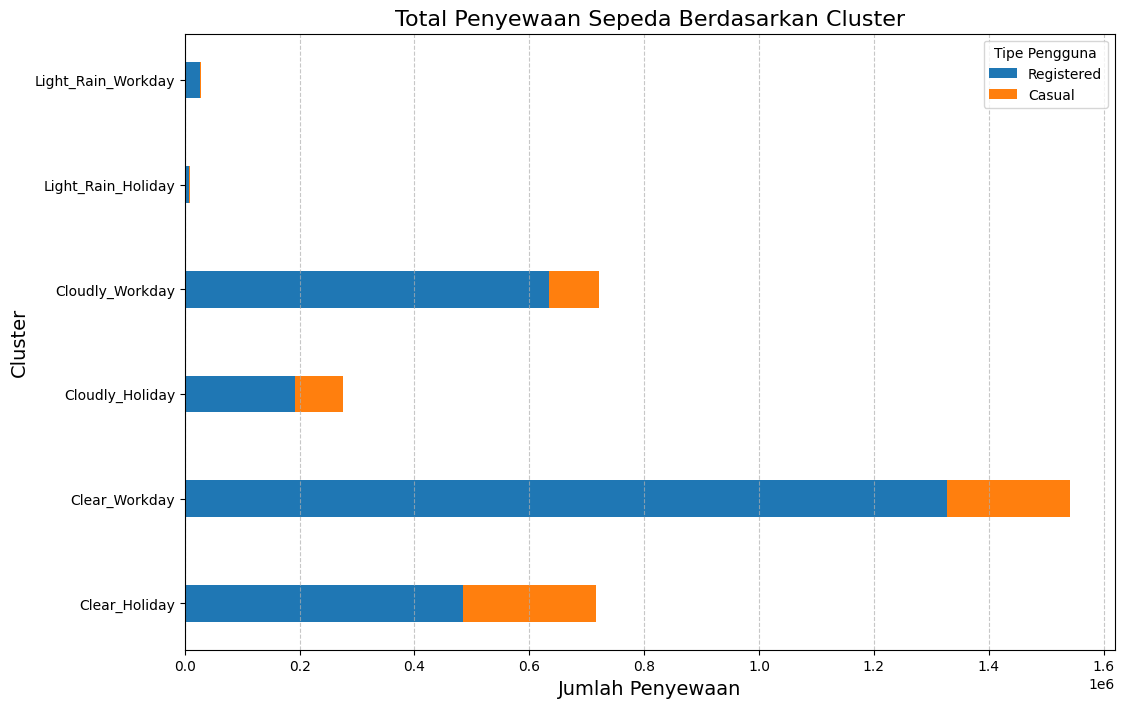

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35

ax.barh(cluster_counts.index, cluster_counts['registered'], height=bar_width, label='Registered', color='#1f77b4')
ax.barh(cluster_counts.index, cluster_counts['casual'], height=bar_width, label='Casual', color='#ff7f0e', left=cluster_counts['registered'])
ax.set_xlabel('Jumlah Penyewaan', fontsize=14)
ax.set_ylabel('Cluster', fontsize=14)
ax.set_title('Total Penyewaan Sepeda Berdasarkan Cluster', fontsize=16)
ax.legend(title='Tipe Pengguna')

ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

**Insight:**

- Terlihat bahwa dalam cuaca apapun penyewa sepeda akan lebih banyak pada hari kerja dibandingkan dengan hari libur.
- Cuaca cerah tetap menjadi pilihan yang paling disukai bagi para penyewa sepeda baik itu di hari kerja maupun di hari libur.

## Conclusion

- **Conclution pertanyaan 1:** Cuaca cerah merupakan faktor pendorong utama dalam peningkatan jumlah penyewaan sepeda. Sebaliknya, cuaca buruk seperti mendung dan hujan ringan hingga lebat menurunkan minat masyarakat untuk menyewa sepeda.

- **Conclution pertanyaan 2:** Terdapat perbedaan pola penyewaan antara pengguna casual dan registered. Pengguna casual cenderung menyewa sepeda pada siang hari, mungkin untuk aktivitas rekreasi atau keperluan singkat. Sedangkan pengguna registered lebih banyak menyewa sepeda pada sore dan malam hari, mungkin untuk pulang kerja atau keperluan lainnya.
